In [1]:
#### Multiple Linear Regression ####

# Importing necessary libraries
from scipy import stats
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from plotnine import ggplot, aes, geom_point, xlab, ylab

# Import data
carseats = pd.read_csv("carseats.csv")
carseats = carseats.dropna(subset = ["Sales", "Competitor_Price", "US", "Price", "Advertising", "Shelf_Location"])

# Create model pieces to handle categorical variables
ct1 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["US"]),
  ],
  remainder = "passthrough"
)

ct2 = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["US", "Shelf_Location"]),
  ],
  remainder = "passthrough"
)

# Build regression models
lr_pipeline_1 = Pipeline(
  [("lr", LinearRegression(fit_intercept = True))]
).set_output(transform="pandas")

lr_pipeline_2 = Pipeline(
  [("preprocessing", ct1),
   ("lr", LinearRegression(fit_intercept = True))]
).set_output(transform="pandas")

lr_pipeline_3 = Pipeline(
  [("preprocessing", ct2),
   ("lr", LinearRegression(fit_intercept = True))]
).set_output(transform="pandas")

y_train = carseats['Sales']

## Traditional Linear Regression Output 1
X_train = pd.DataFrame(carseats["Competitor_Price"])
lr_fitted = lr_pipeline_1.fit(X_train, y_train)

y_pred = lr_fitted.predict(X_train)
r2_1 = r2_score(y_train, y_pred)

print("Coefficients of Model 1:")
coefs = pd.DataFrame.from_dict({"Term": ["Competitor_Price"], "Coefficient": lr_fitted["lr"].coef_[0]})
print(coefs)

Coefficients of Model 1:
               Term  Coefficient
0  Competitor_Price     0.011801


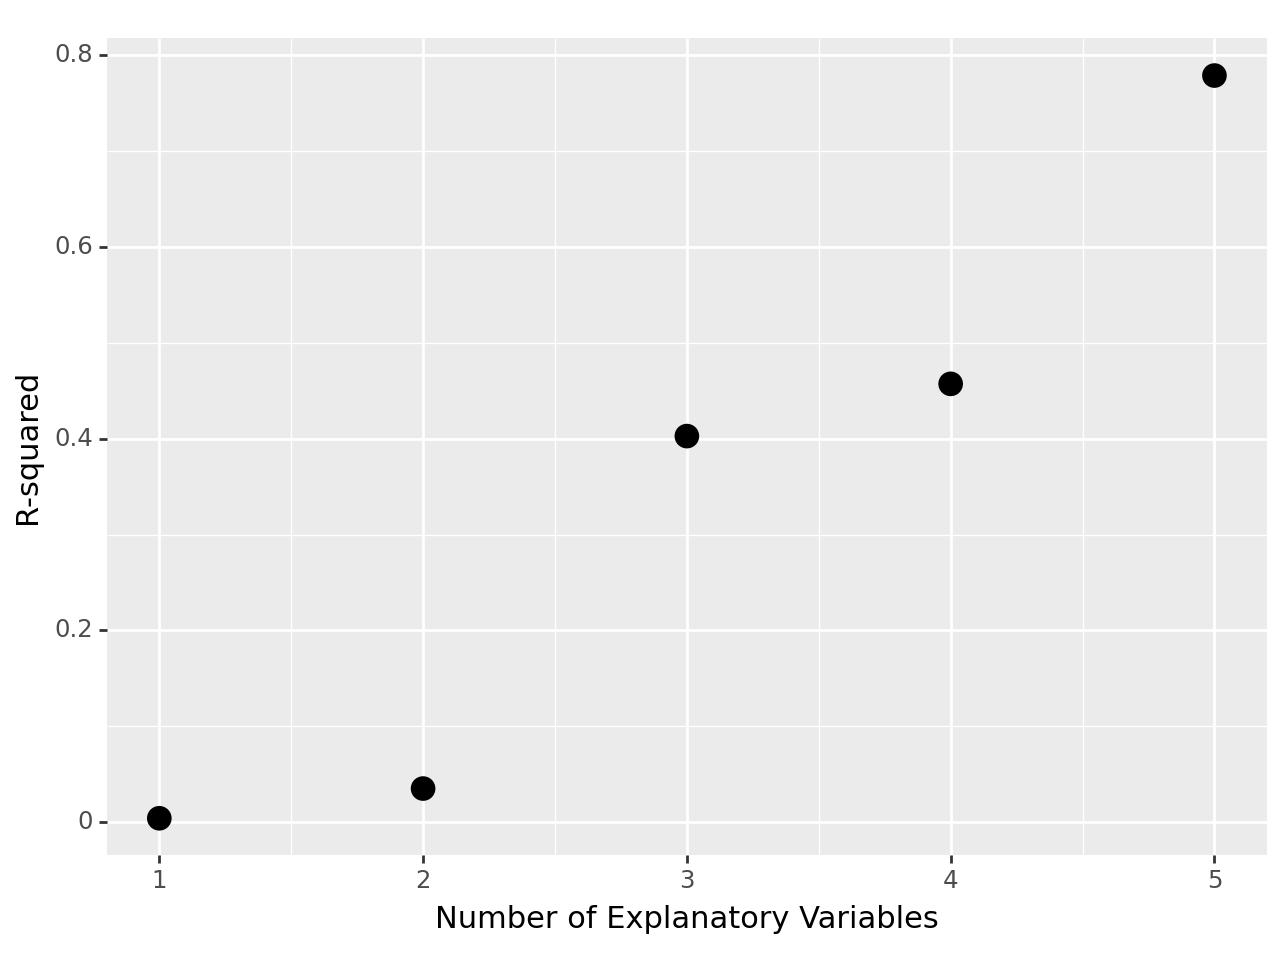

<Figure Size: (640 x 480)>

In [2]:
## Traditional Linear Regression Output 2
X_train = pd.DataFrame(carseats[["Competitor_Price", "US"]])
lr_fitted = lr_pipeline_2.fit(X_train, y_train)

y_pred = lr_fitted.predict(X_train)
r2_2 = r2_score(y_train, y_pred)

## Traditional Linear Regression Output 3
X_train = pd.DataFrame(carseats[["Competitor_Price", "US", "Price"]])
lr_fitted = lr_pipeline_2.fit(X_train, y_train)

y_pred = lr_fitted.predict(X_train)
r2_3 = r2_score(y_train, y_pred)

## Traditional Linear Regression Output 4
X_train = pd.DataFrame(carseats[["Competitor_Price", "US", "Price", "Advertising"]])
lr_fitted = lr_pipeline_2.fit(X_train, y_train)

y_pred = lr_fitted.predict(X_train)
r2_4 = r2_score(y_train, y_pred)

## Traditional Linear Regression Output 5
X_train = pd.DataFrame(carseats[["Competitor_Price", "US", "Price", "Advertising", "Shelf_Location"]])
lr_fitted = lr_pipeline_3.fit(X_train, y_train)

y_pred = lr_fitted.predict(X_train)
r2_5 = r2_score(y_train, y_pred)

# From summary output above
d = {'num_vars': [1, 2, 3, 4, 5], 'r2': [r2_1, r2_2, r2_3, r2_4, r2_5] }
results = pd.DataFrame(data = d)

# Plot the results
(ggplot(results, aes(x = "num_vars", y = "r2")) +
  geom_point(size = 4) +
  xlab("Number of Explanatory Variables") +
  ylab("R-squared")
)